In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Loading Data

In [2]:
file_path = 'data.csv' # loading data 
df = pd.read_csv(file_path)

In [3]:
print(len(df.columns))

29


In [4]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


##### Checking Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [6]:
print(df.columns)

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')


##### Conveting Timestamp values to Date time values


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].astype('int64')//10**9
print(df['timestamp'].head())

0    1452531600
1    1452532200
2    1452532800
3    1452533400
4    1452534000
Name: timestamp, dtype: int64


##### converting object data type values into int or float using to_numeric

In [8]:
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df['lighting_energy'] = pd.to_numeric(df['lighting_energy'], errors='coerce')
df['zone1_temperature'] = pd.to_numeric(df['zone1_temperature'], errors='coerce')
df['zone1_humidity'] = pd.to_numeric(df['zone1_humidity'], errors='coerce')
df['zone2_temperature'] = pd.to_numeric(df['zone2_temperature'], errors='coerce')

##### Checking Null values

In [9]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

##### Replacing nan values with mean value

In [10]:
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\Chintu\AppData\Local\Temp\ipykernel_15128\1911336258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


##### Performing Feature selection to select best features

In [11]:
# seperating targeted feature and remaining features

env_features = ['timestamp', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2']

In [12]:
features = env_features  # env_features are your existing features
x = df[features]
y = df['equipment_energy_consumption']

In [13]:
print(x.columns)

Index(['timestamp', 'lighting_energy', 'zone1_temperature', 'zone1_humidity',
       'zone2_temperature', 'zone2_humidity', 'zone3_temperature',
       'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
       'zone5_temperature', 'zone5_humidity', 'zone6_temperature',
       'zone6_humidity', 'zone7_temperature', 'zone7_humidity',
       'zone8_temperature', 'zone8_humidity', 'zone9_temperature',
       'zone9_humidity', 'outdoor_temperature', 'atmospheric_pressure',
       'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point',
       'random_variable1', 'random_variable2'],
      dtype='object')


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression # Select K Best Method

selector = SelectKBest(score_func=f_regression, k='all')  # 'k=all' to check all features
selector.fit(x, y)

# Get scores for all features
scores = pd.DataFrame({
    'Feature': x.columns,
    'Score': selector.scores_
})

# Sort by scores
print(scores.sort_values(by='Score', ascending=False))

                 Feature      Score
1        lighting_energy  49.371695
4      zone2_temperature  26.683389
22      outdoor_humidity  23.335567
6      zone3_temperature  22.121061
20   outdoor_temperature  16.944951
12     zone6_temperature  15.560457
3         zone1_humidity  10.817344
17        zone8_humidity   8.808405
19        zone9_humidity   7.962538
16     zone8_temperature   6.011809
13        zone6_humidity   5.698140
2      zone1_temperature   5.097502
8      zone4_temperature   4.491153
26      random_variable1   3.989646
21  atmospheric_pressure   2.974449
23            wind_speed   2.043070
27      random_variable2   1.955420
10     zone5_temperature   1.204145
11        zone5_humidity   0.964609
14     zone7_temperature   0.806994
15        zone7_humidity   0.721485
7         zone3_humidity   0.677563
0              timestamp   0.262331
18     zone9_temperature   0.240400
5         zone2_humidity   0.235456
25             dew_point   0.163892
9         zone4_humidity   0

In [18]:
for i in x:    # Correlation Score method
    corr = df[i].corr(df['equipment_energy_consumption'])
    print(f"Correlation between {i} and equipment_energy_consumption: {corr:.4f}")

Correlation between timestamp and equipment_energy_consumption: -0.0039
Correlation between lighting_energy and equipment_energy_consumption: 0.0540
Correlation between zone1_temperature and equipment_energy_consumption: 0.0174
Correlation between zone1_humidity and equipment_energy_consumption: 0.0253
Correlation between zone2_temperature and equipment_energy_consumption: 0.0398
Correlation between zone2_humidity and equipment_energy_consumption: -0.0037
Correlation between zone3_temperature and equipment_energy_consumption: 0.0362
Correlation between zone3_humidity and equipment_energy_consumption: 0.0063
Correlation between zone4_temperature and equipment_energy_consumption: 0.0163
Correlation between zone4_humidity and equipment_energy_consumption: -0.0031
Correlation between zone5_temperature and equipment_energy_consumption: 0.0085
Correlation between zone5_humidity and equipment_energy_consumption: 0.0076
Correlation between zone6_temperature and equipment_energy_consumption: 0.

In [19]:
print(x.columns)

Index(['timestamp', 'lighting_energy', 'zone1_temperature', 'zone1_humidity',
       'zone2_temperature', 'zone2_humidity', 'zone3_temperature',
       'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
       'zone5_temperature', 'zone5_humidity', 'zone6_temperature',
       'zone6_humidity', 'zone7_temperature', 'zone7_humidity',
       'zone8_temperature', 'zone8_humidity', 'zone9_temperature',
       'zone9_humidity', 'outdoor_temperature', 'atmospheric_pressure',
       'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point',
       'random_variable1', 'random_variable2'],
      dtype='object')


In [20]:
x=x.drop(['timestamp','zone1_temperature', 'zone1_humidity',
       'zone2_temperature', 'zone2_humidity', 'zone3_temperature',
       'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
       'zone5_temperature', 'zone5_humidity', 'zone6_temperature',
       'zone6_humidity', 'zone7_temperature', 'zone7_humidity',
       'zone8_temperature', 'zone8_humidity', 'zone9_temperature',
       'zone9_humidity', 'wind_speed', 'dew_point',
       'random_variable1', 'random_variable2'], axis =1)

In [25]:
X=x
Y = df['equipment_energy_consumption']

##### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split # Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)


##### Building and evaluating model with Linear Regression Algorithm

In [27]:
from sklearn.linear_model import LinearRegression # Training model with Linear Regression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 32093.201253415
R^2 Score: 0.0028384743411244973


<Figure size 800x600 with 0 Axes>

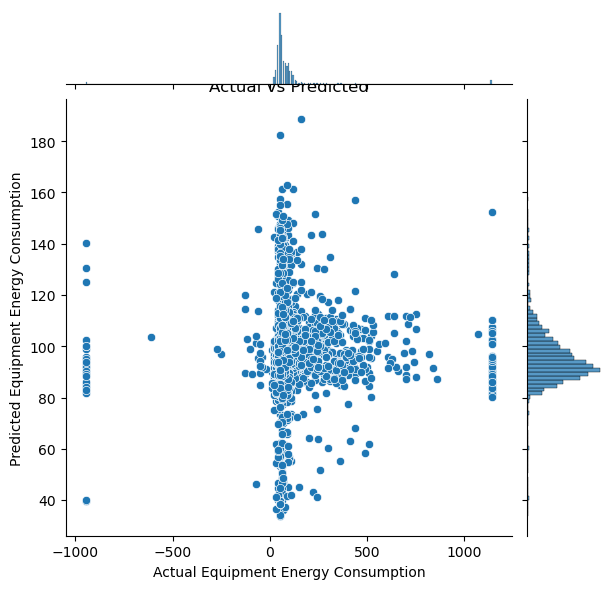

In [30]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=y_test, y=y_pred)
plt.xlabel('Actual Equipment Energy Consumption')
plt.ylabel('Predicted Equipment Energy Consumption')
plt.title('Actual vs Predicted')
plt.show()

##### Building and evaluating model with Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor # Training model with Random Forest Regressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict & evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")

Mean Squared Error: 31767.525749153552
R^2 Score: 0.012957473693503418


<Figure size 800x600 with 0 Axes>

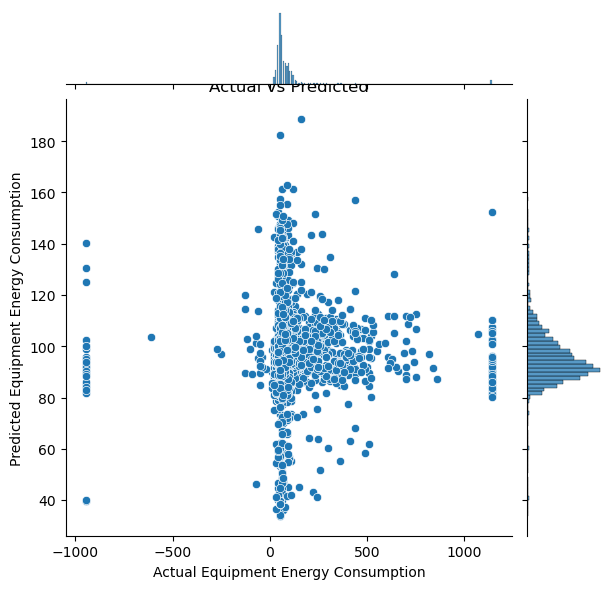

In [33]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=y_test, y=y_pred)
plt.xlabel('Actual Equipment Energy Consumption')
plt.ylabel('Predicted Equipment Energy Consumption')
plt.title('Actual vs Predicted')
plt.show()

##### Saving model and getting output with different inputs

In [35]:
import joblib


joblib.dump(rf_model, 'final_regression_model.pkl')

['final_regression_model.pkl']

In [43]:
feature_cols = ['lighting_energy', 'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity', 'visibility_index']

# New data (make sure it's in the same feature order & preprocessed the same way)
X_new = pd.DataFrame({
    'lighting_energy': [120,132,150],
    'outdoor_temperature': [30,35,40],
    'atmospheric_pressure': [1012,1100,1265],
    'outdoor_humidity': [65,70,72],
    'visibility_index': [8,4,2]
})

predictions = rf_model.predict(X_new)
print(predictions)

[198.01482838   7.57563233  15.06319232]
